### 2.2 page 24

Perceptron

In [1]:
import numpy as np
%matplotlib inline

In [2]:
class Perceptron:
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update            
                errors += int(update != 0.0)
            
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

### 2.3 Traing of Iris dataset


In [3]:
import pandas as pd
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
y = df.iloc[0:100, 4].values
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [7]:
y = np.where(y == 'setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [8]:
X = df.iloc[0:100, [0 ,2]].values

/home/yoshito/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "uppper left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


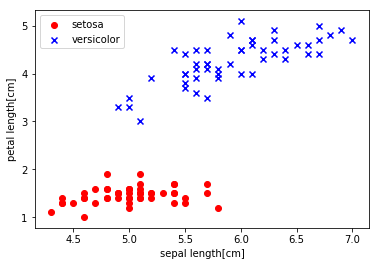

In [9]:
plt.scatter(X[:50, 0], X[:50 ,1], color="red", marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100 ,1], color="blue", marker='x', label='versicolor')
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='uppper left')
plt.show()

In [10]:
ppn = Perceptron(eta = 0.1, n_iter=10)

In [11]:
ppn.fit(X, y)

In [12]:
ppn.errors_

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

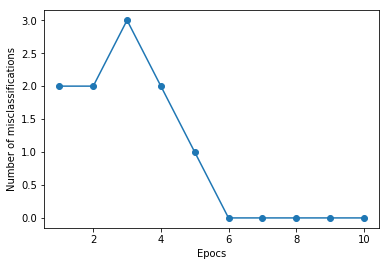

In [13]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epocs')
plt.ylabel('Number of misclassifications')
plt.show()

In [14]:
from matplotlib.colors import ListedColormap

In [15]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

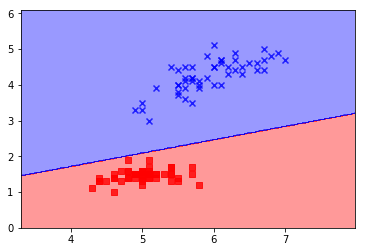

In [16]:
plot_decision_regions(X, y, classifier=ppn)

### 2.5.1 ADALINE


In [17]:
class AdalineGD:
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activatoin(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            print(cost)
            self.cost_.append(cost)
            
        return self
            
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activatoin(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activatoin(X) >= 0.0, 1, -1)

ada1
50.0
2230.853960255
3475977.0425619674
5423372722.58783
8461791557634.333
1.3202470134517626e+16
2.0599091394023023e+19
3.2139634624124605e+22
5.014571244981943e+25
7.823960995538123e+28
ada2
50.0
48.06916268602549
46.75624785073664
45.67588152905383
44.69132934796681
43.75388836192351
42.84602748758452
41.961257613784404
41.09700496411307
40.252087948337085


Text(0.5,1,'Adaline - Learning rate 0.0001')

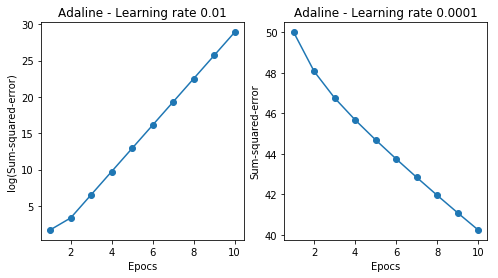

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

print('ada1')
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epocs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

print('ada2')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epocs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

In [19]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [20]:
ada = AdalineGD(n_iter=15, eta=0.01)

In [21]:
ada.fit(X_std, y)

50.0
33.82690621665534
23.153048651759345
16.10855630898839
11.459358765771787
8.390998869258778
6.3659542530613145
5.029472928868978
4.147427014607144
3.565297671844978
3.1811061391532727
2.927548857378686
2.7602070768597793
2.6497654783726463
2.5768766478691667


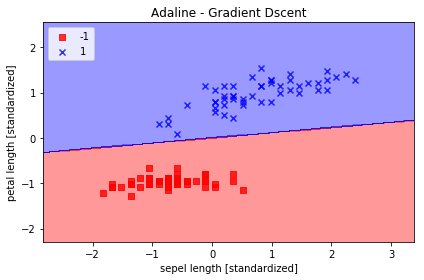

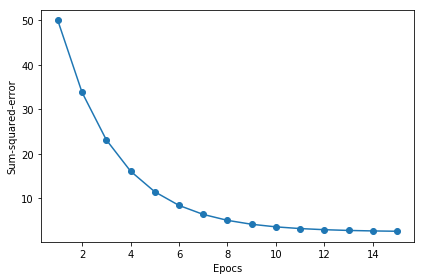

In [22]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Dscent')
plt.xlabel('sepel length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epocs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

## Large scale machi learning and stochastic gradient descent

In [23]:
from numpy.random import seed

In [24]:
class AdalineSGD:
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

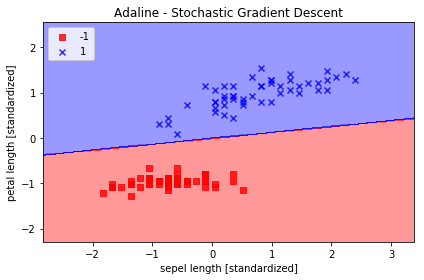

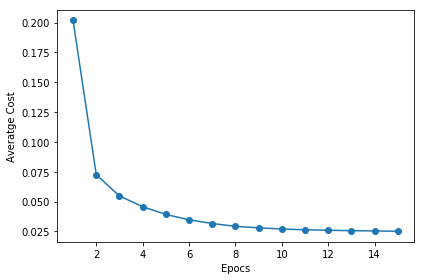

In [25]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepel length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epocs')
plt.ylabel('Averatge Cost')
plt.tight_layout()
plt.show()


In [26]:
ada.partial_fit(X_std[0, :], y[0])

# Summary
## Appendix

In [27]:
class LogisticRegressionGD:
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.5, 1, 0)
    
    def activation(self, X):
        z = self.net_input(X)
        sigmoid = 1.0 / (1.0 + np.exp(-z))
        return sigmoid

In [28]:
X, y = iris.data[:100, [0, 2]], iris.target[:100]
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

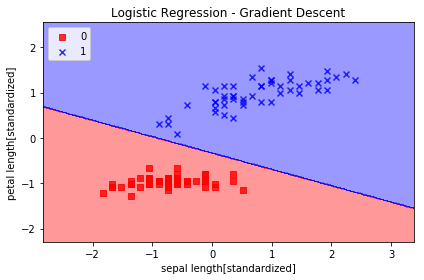

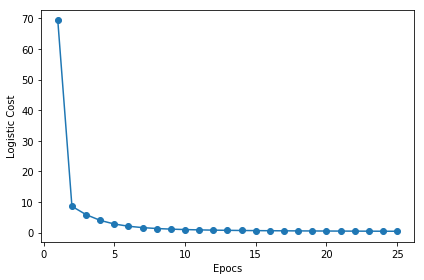

In [29]:
lr = LogisticRegressionGD(eta=0.15, n_iter=25)
lr.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length[standardized]')
plt.ylabel('petal length[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
plt.xlabel('Epocs')
plt.ylabel('Logistic Cost')
plt.tight_layout()
plt.show()